<img src="../images/python_pandas.jpg" alt="Python" style="width: 400px;"/>

## What are DataFrames?

***

DataFrames are a way to store data in rectangular grids that can easily be overviewed. Each row of these grids corresponds to measurements or values of an instance, while each column is a vector containing data for a specific variable. This means that a data frame’s rows do not need to contain, but can contain, the same type of values: they can be numeric, character, logical, etc.
<br> </br>

Data frames in Python come within the Pandas library, and they are defined as a two-dimensional labeled data structures with columns of potentially different types.
<br> </br>

In general, you could say that the Pandas data frame consists of three main components: the data, the index, and the columns.


<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## How do I create DataFrames?
***
DataFrames are 2 dimensional objects that can have a number of different columns for each attribute. You can create DataFrames manually or from one of the following objects:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- A Series
- Another DataFrame

# **Creating DataFrames manually**

The function that you will use is the Pandas Dataframe() function: it requires you to pass the data that you want to put in, the indices and the columns.

Remember that the data that is contained within the data frame doesn’t have to be homogenous.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1, 2, 3],
                   [3, 4, 5],
                   [5, 6, 7],
                   [7, 8, 9]])
df

,0,1,2
0,1,2,3
1,3,4,5
2,5,6,7
3,7,8,9


In [2]:
df = pd.DataFrame([[1, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9]])

print("Shape:", df.shape)
print("Index:", df.index)

df

Shape: (4, 3)
Index: RangeIndex(start=0, stop=4, step=1)


,0,1,2
0,1,2,3
1,3,4,5
2,5,6,7
3,7,8,9


**Understanding the Index**

Before you start with adding, deleting and renaming the components of your DataFrame, you first need to know how you can select these elements.

This is where Indexes come into play, just the way you can use an idex page in a book to locate your chapters, you can use the loc() or iloc() function in pandas to access data in particular columns of your DataFrame.

We will learn about how these functions work and their subtle differences in the next sections.

In [3]:
df2 = pd.DataFrame([[1, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9]],
                   index=['a', 'b', 'c', 'd'], columns=['x', 'y', 'z'])

print("Shape:", df.shape)
print("Index:", df.index)

df2

Shape: (4, 3)
Index: RangeIndex(start=0, stop=4, step=1)


,x,y,z
a,1,2,3
b,3,4,5
c,5,6,7
d,7,8,9


# creating dataframe from list:

In [7]:
data=[['Alex',10],['Bob',12],['Clarke',13]]
df=pd.DataFrame(data,columns=['Name','Age'],dtype=float)
df

,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


# creating dataframe from Dictionary of ndarrays/list:

In [8]:
data={'Name':['Tom','Jack','Steve'],'Age':[28,34,29]}
df=pd.DataFrame(data,index=['Rank1','Rank2','Rank3'])
df

,Name,Age
Rank1,Tom,28
Rank2,Jack,34
Rank3,Steve,29


# creating dataframe from Dictionary of series:

In [14]:
d={'One':pd.Series([1,2,3],index=['a','b','c']),
   'Two':pd.Series([6,7,8,9,11],index=['a','b','c','d','e'])}
df=pd.DataFrame(d)
df

,One,Two
a,1.0,6
b,2.0,7
c,3.0,8
d,NaN,9
e,NaN,11


# creating dataframe from List of dictionaries:

In [15]:
data=[{'a':1,'b':2},{'a':15,'b':17,'c':22,'d':23}]
df=pd.DataFrame(data,index=['FIRST','SECOND'])
df

,a,b,c,d
FIRST,1,2,NaN,NaN
SECOND,15,17,22.0,23.0


# creating dataframe from another dataframe:

In [24]:
old = pd.DataFrame({'A':[4,5],'B':[10,20],'C':[100,50],'D':[-30,-50]},index=['GIRLS','BOY'])
new = old[['A','C','D']].copy()
new

,A,C,D
GIRLS,4,100,-30
BOY,5,50,-50


In [25]:
# another way:
new = old.filter(['A','B','D'], axis=1)
new

,A,B,D
GIRLS,4,10,-30
BOY,5,20,-50


In [26]:
new = old.drop('B', axis=1)
new

,A,C,D
GIRLS,4,100,-30
BOY,5,50,-50


In [28]:
new=pd.DataFrame([old.A,old.B,old.C]).transpose()
new

,A,B,C
GIRLS,4,10,100
BOY,5,20,50


# The Weather Dataset: Reading DataFrames from Files
***
The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.

<img src="../images/weather.jpg" alt="Weather" style="width: 200px;"/>

This data is available as a CSV file. We are going to use Pandas DataFrames and analyse this dataset.


In [29]:
import pandas as pd 
import numpy as np
# Read the data into a data frame

weather_df = pd.read_csv("../data/weather_2012.csv") # 

print("Shape:", weather_df.shape)
print("Index:", weather_df.index)

Shape: (8784, 8)
Index: RangeIndex(start=0, stop=8784, step=1)


In [30]:
weather_df['Date/Time'].head()

0    2012-01-01 00:00:00
1    2012-01-01 01:00:00
2    2012-01-01 02:00:00
3    2012-01-01 03:00:00
4    2012-01-01 04:00:00
Name: Date/Time, dtype: object

**Let's convert the `Date/Time` column datatype from `object` to `timestamp` so that we can access the month directly using the attribute `dt.month`**

In [33]:
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'])
weather_df['Date/Time'].head(5)

0   2012-01-01 00:00:00
1   2012-01-01 01:00:00
2   2012-01-01 02:00:00
3   2012-01-01 03:00:00
4   2012-01-01 04:00:00
Name: Date/Time, dtype: datetime64[ns]

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# How to Analyze DataFrames?
***
The following functions help you understand and explore summaries of your data without having to view the whole DataFrame

## `.info()`
***
Provides a summary of a DataFrame: rows, columns, data types of columns (if automatically detected) and the memory usage.

For detailed summaries of the the DataFrame, you can pass optional arguments verbose=True and null_counts=True to the .info() method to output information for all of the columns

In [34]:
weather_df.info() # Bring the cursor inside the brackets of info() and hit shift+tab & see what you get.
                  # This will work for any function in Pandas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null datetime64[ns]
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


## `.head()`
***
It is used to preview a part of a large DataFrame, similar to the linux `head` command. This reduces time and resources required if  whole DataFrame was to be fetched instead. Shows the first N rows in the data (by default, N=5).

In [35]:
weather_df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## `.index`
***
This attribute provides the `index` of the dataframe.

Indexing identifies data using known indicators that allows intuitive getting and setting of subsets of the data set.

A major advantage of Pandas over NumPy is that each of the columns and rows has a label. Working with column positions is possible, but it can be hard to keep track of which number corresponds to which column.

We can work with labels using the **pandas.DataFrame.loc** method, which allows us to index using labels instead of positions.

In [36]:
weather_df.index

RangeIndex(start=0, stop=8784, step=1)

## `.unique()`
***
This method, which belongs to the `Series` object, can be useful when trying to identify unique values in a column.
- Uniques are returned in order of appearance. 
- It is significantly faster than numpy.unique and includes N/A values

In [37]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

<img src="../images/icon/ppt-icons.png" alt="mini project
" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mini - Challenge - 1
***
Find all the unique Wind Speed values recorded in the dataset

In [38]:
weather_df['Wind Spd (km/h)'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

## `.nunique()`
***
This method belongs to the `Series` object and can be useful when trying to identify the number of unique values in a column. 
- Excludes NA values by default
- Always returns an integer value

In [39]:
weather_df['Weather'].nunique()

50

## `.value_counts()`
***
This method, which belongs to the `Series` object, can be useful when trying to identify unique values and their counts in a column
- The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
- Excludes NA values by default.

In [40]:
weather_df['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

<img src="../images/icon/ppt-icons.png" alt="mini project
" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mini-Challenge - 2
***

Find the number of times when the weather was exactly 'Clear'


In [46]:
weather_df['Weather'].loc[weather_df['Weather']=='Clear'].value_counts()

Clear    1326
Name: Weather, dtype: int64

<img src="../images/icon/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

### How can we get the count for Clear ?
***

In order to get only the number of times when the weather was exactly 'Clear' , we need to used Square brackets after `.value_counts` 
eg. `.value_counts()[3]`

<img src="../images/icon/ppt-icons.png" alt="mini project
" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mini-Challenge - 3
***
**Try one more time..!!**

Find the number of times when the wind speed was exactly 4 km/h


In [47]:
weather_df['Wind Spd (km/h)'][weather_df['Wind Spd (km/h)']==4].value_counts()

4    474
Name: Wind Spd (km/h), dtype: int64

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# Data Manipulation : Gets you desired results
***
The true power of the Pandas DataFrame is the ease and flexibility of manipulating data to get your desired results.

Pandas is best at handling tabular data sets comprising different variable types (integer, float, double, etc.). 

In addition, the pandas library can also be used to perform even the most naive of tasks such as loading data or doing feature engineering on time series data.

## Selection (Part 1)
***
How do you select particular rows/columns from the DataFrame ?

The DataFrame object supports indexing operations just like the Python `list` class and the Pandas Series object, but is much faster and more powerful.

Note that when you extract a single row or column, you get a one-dimensional object as output. That is called a pandas Series. The values on the left are just labels taken from the dataframe index. 

On the other hand, when we extract portions of a pandas dataframe, we get a two-dimensional DataFrame type of object. Something to keep in mind for later.

### How to get the Weather column from the "weather_df" dataframe

In [48]:
col = weather_df['Weather']

print(type(col))
col.head()

<class 'pandas.core.series.Series'>


0                     Fog
1                     Fog
2    Freezing Drizzle,Fog
3    Freezing Drizzle,Fog
4                     Fog
Name: Weather, dtype: object

### How to get the Weather and Temperature columns from the "weather_df" dataframe

In [49]:
two_cols = weather_df[['Weather', 'Temp (C)']] # Take a good look at those brackets. There are two sets of them
                                               # to access more than one columns. 
print(type(two_cols))
two_cols.head()

<class 'pandas.core.frame.DataFrame'>


,Weather,Temp (C)
0,Fog,-1.8
1,Fog,-1.8
2,"Freezing Drizzle,Fog",-1.8
3,"Freezing Drizzle,Fog",-1.5
4,Fog,-1.5


**Keep in mind Whenever you need to take more than two columns need to put double sqaure  like above example**

## **Get the first 25 rows from the "weather_df" dataframe**
***
**Important**: This slicing would work even if the row index had non-numeric labels, because slicing works here the same way as a list

In [50]:
weather_df[:25]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog



**How to get the first 3 alternating rows from the "weather_df" dataframe, but only the Visibility and Relative Humidity columns**


In [51]:
# solution 1
result1 = weather_df[:6:2][['Rel Hum (%)', 'Visibility (km)']]

# solution 2
result2 = weather_df[['Rel Hum (%)', 'Visibility (km)']][:6:2]

# are they the same?
result1 == result2

,Rel Hum (%),Visibility (km)
0,True,True
2,True,True
4,True,True


#### So which of the two solutions should you use?
***
**Answer**: Neither. Because we're indexing more than once (Chained Indexing).
When you use chained indexing, the order and type of the indexing operation partially determine whether the result is a slice into the original object, or a copy of the slice.

Let's analyse (break down) one of the above solutions.

In [52]:
# first indexing
df1 = weather_df[:6:2]

# second indexing
df2 = df1[['Rel Hum (%)', 'Visibility (km)']]

While both results are correct in this **read-only** case, chained indexing may give unpredictable behaviours when **writing** to a dataframe.

This is because indexing could either return a "view" (of slices of the dataframe), or a copy of the dataframe.

## Selection (Part 2)
***
Pandas provides a powerful way to work with both rows and columns together, optionally using their label indices or numeric indices.

- **`.loc :`**<br/>
Purely label-location based indexer for selection by label (but may also be used with a boolean array).<br/>
**Important: If you use slicing in loc, it will return the end index as well**
<br/><br/>

- **`.iloc:`**<br/>
Purely integer-location based indexing for selection by position (but may also be used with a boolean array).

Allowed inputs are:
- A single label, e.g. 5 or 'a'
- A list or array of labels, e.g. ['a', 'b', 'c']
- A slice object with labels, e.g. 'a':'f'


<img src="../images/icon/ppt-icons.png" alt="mini project
" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Mini-Challenge - 4
***

Get the first 3 alternating rows from the `weather_df` dataframe, but only the Visibility and Relative Humidity columns


In [53]:
# Using loc or iloc
# NOTE: slice is `:5:2`, not 6 !
weather_df[['Visibility (km)','Rel Hum (%)']].iloc[:5:2]

,Visibility (km),Rel Hum (%)
0,8.0,86
2,4.0,89
4,4.8,88


# using of iloc,loc to select rows & columns in pandas dataframe:

In [61]:
import pandas as pd
import random
 # read the data from the downloaded CSV file.
data = pd.read_csv('C:/Users/DELL/Downloads/16-DAYS-ML/26-Weeks-Of-Data-Science-master/Week-04-Pandas-Advanced/uk-500.csv')
# set a numeric id for use as an index for examples.
data['id'] = [random.randint(0,1000) for x in range(data.shape[0])]
data.head(5)

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,674
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,814
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,285
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,101
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,641


# 1. Selecting pandas data using “iloc”:

In [ ]:
# Single selections using iloc and DataFrame
# Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# Columns:
data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

In [ ]:
# Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).

# **There’s two gotchas to remember when using iloc in this manner:**

    1.Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.

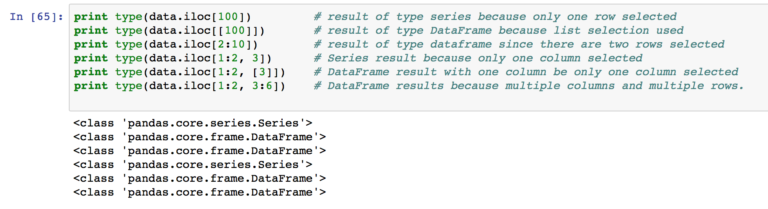

In [64]:
from IPython.display import Image  # importing a image from my computer.
i = Image(filename='C://Users//DELL//Downloads//16-DAYS-ML//26-Weeks-Of-Data-Science-master//Week-04-Pandas-Advanced//a.png')
i # blueprint
# When using .loc, or .iloc, you can control the output format by passing lists or single values to the selectors.

    2.When selecting multiple columns or multiple rows in this manner, remember that in your selection e.g.[1:5], the rows/columns selected will run from the first number to one minus the second number. e.g. [1:5] will go 1,2,3,4., [x,y] goes from x to y-1.

In practice, I rarely use the iloc indexer, unless I want the first ( .iloc[0] ) or the last ( .iloc[-1] )  row of the data frame.

# 2. Selecting pandas data using “loc”:

The Pandas loc indexer can be used with DataFrames for two different use cases:

    a.) Selecting rows by label/index
    b.) Selecting rows with a boolean / conditional lookup

In [65]:
data.set_index("last_name", inplace=True)
data.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,674
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,814
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,285
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,101
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,641


In [67]:
data.loc['Andrade']

first_name                                France
company_name                 Elliott, John W Esq
address                             8 Moor Place
city              East Southbourne and Tuckton W
county                               Bournemouth
postal                                   BH6 3BE
phone1                              01347-368222
phone2                              01935-821636
email                 france.andrade@hotmail.com
web             http://www.elliottjohnwesq.co.uk
id                                           285
Name: Andrade, dtype: object

In [70]:
data.loc[['Andrade','Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,285
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,641


 Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.

Select columns with .loc using the names of the columns. In most of my data work, typically I have named columns, and use these named selections.

In [71]:
data.loc[['Andrade','Veness'],['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection </code>data.loc[‘Bruch’:’Julio’]</code> will return all rows in the data frame between the index entries for “Bruch” and “Julio”. The following examples should now make sense:


# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data.loc[['Andrade', 'Veness'], 'city':'email']
# Select same rows, with just 'first_name', 'address' and 'city' columns
data.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
# select the row with 'id' = 487
data.loc[487]

Note that in the last example, data.loc[487] (the row with index value 487) is not equal to data.iloc[487] (the 487th row in the data). The index of the DataFrame can be out of numeric order, and/or a string or multi-value.

# 2b. Boolean / Logical indexing using .loc

In [72]:
data.loc[data['first_name']=='Antonio']

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Villamarin,Antonio,Combs Sheetmetal,353 Standish St #8264,Little Parndon and Hare Street,Hertfordshire,CM20 2HT,01559-403415,01388-777812,antonio.villamarin@gmail.com,http://www.combssheetmetal.co.uk,915
Glasford,Antonio,Saint Thomas Creations,425 Howley St,Gaer Community,Newport,NP20 3DE,01463-409090,01242-318420,antonio_glasford@glasford.co.uk,http://www.saintthomascreations.co.uk,798
Heilig,Antonio,Radisson Suite Hotel,35 Elton St #3,Ipplepen,Devon,TQ12 5LL,01324-171614,01442-946357,antonio.heilig@gmail.com,http://www.radissonsuitehotel.co.uk,287


In [73]:
data.loc[data['first_name']=='Erasmo',['company_name','email','phone1']]

,company_name,email,phone1
last_name,,,
Talentino,Active Air Systems,erasmo.talentino@hotmail.com,01492-454455
Gath,Pan Optx,egath@hotmail.com,01445-796544
Rhea,Martin Morrissey,erasmo_rhea@hotmail.com,01507-386397


Selecting multiple columns with loc can be achieved by passing column names to the second argument of .loc[]
Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [74]:
data.loc[data['first_name']=='Antonio','email']

last_name
Villamarin       antonio.villamarin@gmail.com
Glasford      antonio_glasford@glasford.co.uk
Heilig               antonio.heilig@gmail.com
Name: email, dtype: object

In [75]:
data.loc[data['first_name']=='Antonio',['email']]

,email
last_name,
Villamarin,antonio.villamarin@gmail.com
Glasford,antonio_glasford@glasford.co.uk
Heilig,antonio.heilig@gmail.com


If selections of a single column are made as a string, a series is returned from .loc. Pass a list to get a DataFrame back.

Make sure you understand the following additional examples of .loc selections for clarity:

# Select rows with first name Antonio, # and all columns between 'city' and 'email'
data.loc[data['first_name'] == 'Antonio', 'city':'email']
 
# Select rows where the email column ends with 'hotmail.com', include all columns
data.loc[data['email'].str.endswith("hotmail.com")]   
 
# Select rows with last_name equal to some values, all columns
data.loc[data['first_name'].isin(['France', 'Tyisha', 'Eric'])]   
       
# Select rows with first name Antonio AND hotmail email addresses
data.loc[data['email'].str.endswith("gmail.com") & (data['first_name'] == 'Antonio')] 
 
# select rows with id column between 100 and 200, and just return 'postal' and 'web' columns
data.loc[(data['id'] > 100) & (data['id'] <= 200), ['postal', 'web']] 
 
# A lambda function that yields True/False values can also be used.
# Select rows where the company name has 4 words in it.
data.loc[data['company_name'].apply(lambda x: len(x.split(' ')) == 4)] 
 
# Selections can be achieved outside of the main .loc for clarity:
# Form a separate variable with your selections:
idx = data['company_name'].apply(lambda x: len(x.split(' ')) == 4)
# Select only the True values in 'idx' and only the 3 columns specified:
data.loc[idx, ['email', 'first_name', 'company']]

Logical selections and boolean Series can also be passed to the generic [] indexer of a pandas DataFrame and will give the same results: data.loc[data[‘id’] == 9] == data[data[‘id’] == 9] .

# 3. Selecting pandas data using ix

The ix[] indexer is a hybrid of .loc and .iloc. Generally, ix is label based and acts just as the .loc indexer. However, .ix also supports integer type selections (as in .iloc) where passed an integer. This only works where the index of the DataFrame is not integer based. ix will accept any of the inputs of .loc and .iloc.

Slightly more complex, I prefer to explicitly use .iloc and .loc to avoid unexpected results.

As an example:

# ix indexing works just the same as .loc when passed strings
data.ix[['Andrade']] == data.loc[['Andrade']]
# ix indexing works the same as .iloc when passed integers.
data.ix[[33]] == data.iloc[[33]]
 
# ix only works in both modes when the index of the DataFrame is NOT an integer itself.

# Setting values in DataFrames using .loc

# Change the first name of all rows with an ID greater than 2000 to "John"
data.loc[data['id'] > 2000, "first_name"] = "John"

# Change the first name of all rows with an ID greater than 2000 to "John"
data.loc[data['id'] > 2000, "first_name"] = "John"

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Filtering
***

![Filter](../images/filters1.jpg)
Image Source:https://pixabay.com/en/yashica-filter-camera-vintage-711794/
<br/>

Anything that takes in data, processes it, and provides an output

Input Data ⟶ Filter ⟶ Output Data

Filtering rows of a DataFrame is an almost mandatory task for Data Analysis with Python. Given a Data Frame, we may not be interested in the entire dataset but only in specific rows.

### Find all instances when snow was recorded
***
Whether or not it snowed can be found out using the Weather column.

Note that this routine does not filter a dataframe on its contents. The filter is applied to the labels of the index.

In [76]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [77]:
# Basically, we want a way to "filter out" records that have the word "snow" (case insensitive) in the last column

snowed_filter = weather_df['Weather'].str.lower().str.contains('snow')
weather_df[snowed_filter]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
50,2012-01-03 02:00:00,-10.5,-15.8,65,22,12.9,100.53,Snow Showers
51,2012-01-03 03:00:00,-11.3,-18.7,54,33,25.0,100.61,Snow Showers
53,2012-01-03 05:00:00,-12.9,-19.1,60,22,25.0,100.76,Snow Showers
54,2012-01-03 06:00:00,-13.3,-19.3,61,19,25.0,100.85,Snow Showers
55,2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow


**Find all instances when wind speed was above 24 and visibility was 25**

In [78]:
df = weather_df[(weather_df['Wind Spd (km/h)'] > 24) & (weather_df['Visibility (km)']== 25)]
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy


## Summary / Cheatsheet: Selection/Indexing/Filtering
***
This is a handy reminder for what syntax will get what result.

Syntax | Function | Remarks
:--- | :--- | :---
**`df['some_label']`** |  Get the (single) Column referenced by name `some_label` | A **str** is provided
**`df[['label1', 'label2']]`** | Get multiple columns referenced by given names | A **list** is provided 
**`df[start:end:step]`** | Get corresponding rows (same as list slicing) | A **slicing operator**<br/> is provided
**`df[boolean array/df]`** | Get corresponding rows (same as list slicing) | A **filter object** is provided
**`df.loc [row_sel, col_sel]`** | Select specified rows and columns (by labels) | 
**`df.iloc[row_sel, col_sel]`** | Select specified rows and columns (by index) | 


<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Working with Columns
***
- We will learn how to carry out Series operations on DataFrame Columns
- How to add or update columns within a DataFrame
- How to rename specific columns
- How to delete or drop a column that is no longer required for analysis

### Series Operations
***
A series is a one-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object supports both integer- and label-based indexing and provides a host of methods for performing operations involving the index. Statistical methods from ndarray have been overridden to automatically exclude missing data (currently represented as NaN).

Operations between Series (+, -, /, , *) align values based on their associated index values– they need not be the same length. The result index after operation will be the sorted union of the two indexes.

Add 10 to the values in the column "Wind Spd (km/h)" using the "+" operator

In [79]:
add_10 = weather_df["Wind Spd (km/h)"] + 10
add_10.head()

0    14
1    14
2    17
3    16
4    17
Name: Wind Spd (km/h), dtype: int64

Multiply the values in the 'Visibility (km)' column by 2 using the asterisk (*) operator

In [80]:
mult_2 = weather_df['Visibility (km)'] * 2
mult_2.head()

0    16.0
1    16.0
2     8.0
3     8.0
4     9.6
Name: Visibility (km), dtype: float64

Add the "Temp (C)" and "Dew Point Temp (C)" columns as series "temperature"

THis can be done by simply passing the column names and using the "+" operator

In [81]:
temperature = weather_df["Temp (C)"] + weather_df["Dew Point Temp (C)"]
temperature.head()

0   -5.7
1   -5.5
2   -5.2
3   -4.7
4   -4.8
dtype: float64

## Apply / Call Functions

## `.apply()`
***

You can pass any number of arguments to the function that apply is calling through either unnamed arguments, passed as a tuple to the args parameter, or through other keyword arguments internally captured as a dictionary by the kwds parameter.

Invoke function on values of Series. Can be a NumPy function that applies to the entire Series or a Python function that only works on single values

In [82]:
# Applying custom functions

def times2(value):
    return value * 2

t2 = weather_df['Visibility (km)'].apply(times2)
t2.head()

0    16.0
1    16.0
2     8.0
3     8.0
4     9.6
Name: Visibility (km), dtype: float64

## `.describe()`
***

The above function is used to summarize the  central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [83]:
weather_df['Visibility (km)'].describe()

count    8784.000000
mean       27.664447
std        12.622688
min         0.200000
25%        24.100000
50%        25.000000
75%        25.000000
max        48.300000
Name: Visibility (km), dtype: float64

### Adding/Updating Columns

In [84]:
visibility_in_meter = weather_df["Visibility (km)"] * 1000  
weather_df["Visibility (m)"] = visibility_in_meter

weather_df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (m)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,8000.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8000.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4000.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4000.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4800.0


### Renaming Columns

## `.rename()`
***

Alter Series index labels or name. It will replace the existing names with the names you provide, in the order you provide.

You can also assign the names by index.

The rename() method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [85]:
# Notice the "inplace=True" parameter. This means the renaming has been assigned in the old DataFrame itself

weather_df.rename(columns={'Visibility (m)': 'Visibility (meters)'}, inplace=True)
weather_df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (meters)
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,8000.0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,8000.0
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",4000.0
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",4000.0
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4800.0


### Deleting Columns

## `.drop()`
***

Return new object with labels in requested axis removed.

Note that Pandas uses zero based numbering, so 0 is the first row, 1 is the second row, etc.
You can select ranges relative to the top or drop relative to the bottom of the DataFrame as well.

- Note: Specifying both labels and index or columns will raise a ValueError.

In [86]:
# Since we have not mentioned inplace=True, it returns a new dataframe.
weather_df.drop(labels=['Visibility (meters)'], axis=1).head(3)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [237]:
# Alternatively, you can also write
# del weather_df2['Visibility (meters)']

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Sorting
***

## `.sort_values()`
***

Sort by the values along either axis, in a user specified order. The order can be specified by selecting true or false for the "ascending" parameter.

In [87]:
sorted_by_temp = weather_df.sort_values('Temp (C)', ascending=False)  # can be inplace as well
sorted_by_temp.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Visibility (meters)
4695,2012-07-14 15:00:00,33.0,16.8,38,22,48.3,101.31,Mainly Clear,48300.0
4143,2012-06-21 15:00:00,33.0,19.0,44,24,24.1,100.20,Mainly Clear,24100.0
4696,2012-07-14 16:00:00,32.9,15.3,35,24,48.3,101.26,Mainly Clear,48300.0
5199,2012-08-04 15:00:00,32.8,18.8,44,17,24.1,101.39,Clear,24100.0
4694,2012-07-14 14:00:00,32.7,15.3,35,28,48.3,101.35,Mainly Clear,48300.0


### Which were the top 10 hottest values and their counts?

In [88]:
sorted_value_counts = weather_df['Temp (C)'].value_counts().sort_values(ascending=False)
sorted_value_counts.iloc[:10]

16.6    65
1.1     58
0.8     47
1.5     45
19.3    44
21.1    43
2.6     43
0.4     41
1.3     40
14.6    39
Name: Temp (C), dtype: int64

### What is the mean temperature recorded by month?

## `.mean()`
***

- It is an aggregation function used to combine multiple values
- Return the mean of the values for the requested axis
- Returns scalar or Series (if level specified)

In [89]:
# One Solution
mean_temperatures = {}

for month in range(1, 13):
    mean_temperatures[month] = weather_df.loc[weather_df['Date/Time'].dt.month == month, 'Temp (C)'].mean()

pd.Series(mean_temperatures)

1     -7.371505
2     -4.225000
3      3.121237
4      7.009306
5     16.237769
6     20.134028
7     22.790054
8     22.279301
9     16.484444
10    10.954973
11     0.931389
12    -3.306317
dtype: float64

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# Pivot Tables : Excellent way to Summarize your Data!
***
- A pivot table is a tool that allows you to reorganize and summarize selected columns and rows of data in a dataframe <br/><br/>

- Pivot tables provide an easy way to subset by one column and then apply a calculation like a sum or a mean <br/><br/>

- Pivot tables first groups and only then applies a calculation

In [90]:
data = {
    'A': ['foo','foo','foo','bar','bar','bar'],
    'B': ['one','one','two','two','one','one'],
    'C': ['x','y','x','y','x','y'],
    'D': [1, 3, 2, 5, 4, 1]
}

df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [91]:
pivot_df = df.pivot_table(
                values='D',      # We want to aggregate the values of which column?
                index='A',       # We want to use which column as the new index?
                columns=['C'],   # We want to use the values of which column as the new columns? (optional)
                aggfunc=np.sum)  # What aggregation function to use ?


pivot_df

C,x,y
A,,
bar,4,6
foo,3,3


In [92]:
# convert it back to a simple index

pivot_df.reset_index()

C,A,x,y
0,bar,4,6
1,foo,3,3


### What is the mean temperature recorded by month?

In [93]:
mean_temperature_df = weather_df.pivot_table(values='Temp (C)', index=weather_df['Date/Time'].dt.month, aggfunc=np.mean)
mean_temperature_df # the numbers 1 to 12 denote the respective months from January to December.

,Temp (C)
Date/Time,
1,-7.371505
2,-4.225000
3,3.121237
4,7.009306
5,16.237769
6,20.134028
7,22.790054
8,22.279301
9,16.484444


<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# Group By
***
The groupby method allows you to group rows of data together and call aggregate functions that applies to the whole group.

Any groupby operation involves one of the following operations on the original object. They are −
- Splitting the Object
- Applying a function
- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- Aggregation − computing a summary statistic
- Transformation − perform some group-specific operation
- Filtration − discarding the data with some condition

In [94]:
mean_temperature_df2 = weather_df.groupby(weather_df['Date/Time'].dt.month).agg(np.mean).reset_index()
mean_temperature_df2

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Visibility (meters)
0,1,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349,22100.268817
1,2,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414,25182.183908
2,3,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255,26177.956989
3,4,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833,31777.083333
4,5,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164,29418.548387
5,6,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222,32104.166667
6,7,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333,33655.107527
7,8,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097,30192.607527
8,9,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903,30603.472222
9,10,10.954973,6.533468,75.731183,15.475806,25.111022,100.909368,25111.021505


<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# Concat, Merge and Join 
<br/>

***
There are 3 key ways of combining DataFrames together:

- **Concatenation**: Concatenation glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on <br/><br/>
- **Merging**: The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together<br/><br/>
- **Join**: Join is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

## Concat

Many a time, we are required to combine different arrays. So, instead of typing each of their elements manually, you can use array concatenation to handle such tasks easily.

In [95]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
}, index=[0, 1, 2, 3])

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
}, index=[4, 5, 6, 7])

df3 = pd.DataFrame({
    'A': ['A8', 'A9', 'A10', 'A11'],
    'B': ['B8', 'B9', 'B10', 'B11'],
    'C': ['C8', 'C9', 'C10', 'C11'],
    'E': ['D8', 'D9', 'D10', 'D11']
}, index=[8, 9, 10, 11])

In [96]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [97]:
# if you don't specify an axis, it defaults to axis=0, which means it appends to rows
pd.concat([df1, df2, df3])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,D4,NaN
5,A5,B5,C5,D5,NaN
6,A6,B6,C6,D6,NaN
7,A7,B7,C7,D7,NaN
8,A8,B8,C8,NaN,D8
9,A9,B9,C9,NaN,D9


In [98]:
# axis=1 means concat along columns

pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,E
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Join
***
Simply join two DFs having potentially different row indices

You can do both inner as well as outer joins using the join function in pandas
- Parameters {‘inner’, ‘outer’}, default ‘outer’. Outer for union and inner for intersection.

In [99]:
# Join
left_df = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2']) 

right_df = pd.DataFrame({
    'C': ['C0', 'C2', 'C3'],
    'D': ['D0', 'D2', 'D3']
}, index=['K0', 'K2', 'K3'])

left_df.join(right_df, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Merge

Many a times you will be working with multiple dataframes all at once.

The merge function allows them to be combined into a single data frame

In [100]:
# Merging on multiple keys
left = pd.DataFrame({
    'key1': ['K0', 'K0', 'K1', 'K2'],
    'key2': ['K0', 'K1', 'K0', 'K1'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})
    
right = pd.DataFrame({
    'key1': ['K0', 'K1', 'K1', 'K2'],
    'key2': ['K0', 'K0', 'K0', 'K0'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

pd.merge(left, right, how='outer', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [101]:
# other options are 'inner', 'left', 'right'

pd.merge(left, right, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
